Python library for data handling available on git. Followed these instructions to install in my local directory I did 
  - cd workingDirectory
  - git clone https://github.com/LAL/trackml-library
  - python3 -m pip install --user --editable trackml-library

Now I can easily look at the data provided by the TrackML challenge. First lets try and get the information out of the event by reading all the information (hits/cells/particles/truths) from the event.

In [4]:
import trackml
from trackml.dataset import load_event
cFirstEvent=1010
cEventDataDir='./train_100_events'
def getPath(pDataDir,pEventID) : 
    return '%s/event%09d' % (pDataDir, pEventID)


hits, cells, particles, truth = load_event(getPath(cEventDataDir,cFirstEvent))#'./train_100_events/event000001010')
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503805785800704,-0.009375,-0.004808,8.77349,-7.712350,24.136200,-7.572210,-1,12
1,4503943224754176,-0.009375,-0.004808,8.77349,19.816601,-7.746410,66.998199,1,11
2,4504011944230912,-0.009375,-0.004808,8.77349,2.567960,-0.827171,9.292110,1,11
3,4504080663707648,-0.009375,-0.004808,8.77349,2.307620,-3.136100,11.203400,1,15
4,4504149383184384,-0.009375,-0.004808,8.77349,0.919817,-0.527999,2.873910,-1,13


Then I can simply look at the hit information in the (x,y,z) coordinate system. Since this is python (and is sort of awesome!) I can also do something like only look at hits in a given layer/volume/module. This block of codes returns a plot showing the hits in (y,x) and (r,z) coordinates for a given volume id.

[900724048642703360]


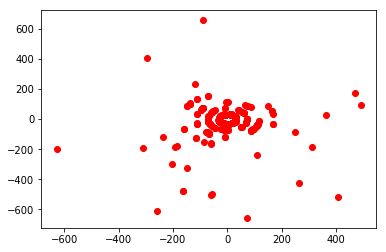

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as math
import numpy as np
# Load in convex hull method
from scipy.stats.stats import pearsonr
from scipy.spatial import ConvexHull
#circle
from scipy import optimize

nMinHits=5
#draw track + hits 
def getTrackParameters(pIndex) : 
    dataFrame = pd.DataFrame(particles)
    
# get tracks 
# start with those that have 5 hits 
def getTracks(sampleSize) : 
    dataFrame = pd.DataFrame(particles)
    dataFrame = dataFrame[dataFrame['nhits']>=nMinHits]
    # get unique list of particle IDs 
    particle_IDs = np.random.choice(dataFrame.particle_id.unique(),sampleSize)
    print(particle_IDs)
    dataFrame = pd.DataFrame(truth)
    df_truth = dataFrame[dataFrame['particle_id'].isin(particle_IDs)]
    #df_particles = dataFrame[dataFrame['particle_id'] == particle_IDs[pIndex]]
    #dataFrame = pd.DataFrame(truth)
    #df_truth = dataFrame[dataFrame['particle_id'] == particle_IDs[pIndex]]
    return df_truth

def getHitsFromTracks(df_truth, sampleSize) : 
    dataFrame = pd.DataFrame(hits)
    df_hits = dataFrame[dataFrame['hit_id'].isin(df_truth.hit_id)]
    return df_hits

def getOtherHits(df_truth, sampleSize) : 
    dataFrame = pd.DataFrame(hits)
    df_hits = dataFrame[dataFrame['hit_id'].isin(df_truth.hit_id)== False]
    return  df_hits.sample(n=sampleSize)

    

#return truths for a given particle 
def getTruth(pTruths, particleID) :
    dataFrame = pd.DataFrame(pTruths)
    df_t = dataFrame[dataFrame['particle_id'] == particleID]
    return df_t


#return hits in a given volume 
def getHitsForVolume(pHits, pVolumeID) : 
    dataFrame = pd.DataFrame(pHits)
    df_v = dataFrame[dataFrame['volume_id'] == pVolumeID]
    #df_v = df_v[df_v['layer_id'] < 6]
    return df_v

#return hits in a given volume 
def getHitsForVolume_perLayer(pHits, pVolumeID, pLayerID) : 
    dataFrame = pd.DataFrame(pHits)
    df_v = dataFrame[dataFrame['volume_id'] == pVolumeID]
    df_v = df_v[df_v['layer_id'] == pLayerID]
    return df_v

# make things look familiar...
#plots hits in (x,y) [cartesian] and (z,r) coordinate system [cylindrical]
def showHitsForVolume(pHits, pVolumeID) : 
    df_v = getHitsForVolume(pHits,pVolumeID)   
    #now estimate r-coordinate (in x,y plane)
    r = (df_v.x**2 + df_v.y**2)**0.5
    phi = np.arctan(df_v.y/df_v.x)
    #phi=(math.pi/4)*(df_v.y/df_v.x) - (df_v.y/df_v.x)*(abs(df_v.y/df_v.x)-1)*(0.2447+0.0663*abs(df_v.y/df_v.x))
    plt.figure(1)
    plt.subplot(121)
    plt.plot(df_v.x,df_v.y, 'bs')
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')

    plt.subplot(122)
    plt.plot(df_v.z,r, 'bs')
    plt.xlabel('z [cm]')
    plt.ylabel('r [cm]')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
    #plt.subplot(133)
    #plt.plot(phi,r, 'bs')
    #plt.xlabel('phi [rad]')
    #plt.ylabel('r [cm]')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
    return plt

def showHitsForVolume_perLayer(pHits, pVolumeID, pLayerID) : 
    df_v = getHitsForVolume_perLayer(pHits,pVolumeID,pLayerID)   
    #now estimate r-coordinate (in x,y plane)
    r = (df_v.x**2 + df_v.y**2)**0.5
    phi = np.arctan(df_v.y/df_v.x)
    #phi=(math.pi/4)*(df_v.y/df_v.x) - (df_v.y/df_v.x)*(abs(df_v.y/df_v.x)-1)*(0.2447+0.0663*abs(df_v.y/df_v.x))
    plt.figure(1)
    plt.subplot(121)
    plt.plot(df_v.x,df_v.y, 'bs')
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')

    plt.subplot(122)
    plt.plot(df_v.z,r, 'bs')
    plt.xlabel('z [cm]')
    plt.ylabel('r [cm]')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
    #plt.subplot(133)
    #plt.plot(phi,r, 'bs')
    #plt.xlabel('phi [rad]')
    #plt.ylabel('r [cm]')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
    return plt

def showHitsForParticle(pTruth,particleID) : 
    df_t = getTruth(pTruth,particleID)
    r = (df_t.tx**2 + df_t.ty**2)**0.5
    plt.figure(1)
    plt.subplot(121)
    plt.plot(df_t.tx,df_t.ty, 'bs')
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')
    
    plt.subplot(122)
    plt.plot(df_t.tz,r, 'bs')
    plt.xlabel('z [cm]')
    plt.ylabel('r [cm]')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
   
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.55, hspace=0.25, wspace=0.35)
    
    return plt

def draw(x,y) : 
    plt.figure(1)
    plt.plot(x,y, 'bs')
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')
    
    return plt 

nTrueTracks=1
nFakeHits=5
dh = pd.DataFrame(hits)
dh = dh[np.fabs(dh['z']) < 1]
d_t = getTracks(nTrueTracks)
d_ht = getHitsFromTracks(d_t,nTrueTracks)
d_hf = getOtherHits(d_t,nFakeHits)
# r = np.sqrt(d.tx**2 + d.ty**2)
# phi = np.arctan(d.ty/d.tx)
#plt.plot(d_t['tx'],d_t['ty'],'gs')
r_ht = np.sqrt(d_ht.x**2 + d_ht.y**2)
d_ht['r'] = r_ht
#print(r_ht)
r_hf = np.sqrt(d_hf.x**2 + d_hf.y**2)
d_hf['r'] = r_hf
d = pd.concat([d_ht, d_hf])
plt.plot(dh.x,dh.y,'or')
#plt.plot(d_ht['z'],d_ht['r'],'ro', mfc='none')
#plt.plot(d_hf['z'],d_hf['r'],'rs')
#plt.xlabel('z [cm]')
#plt.ylabel('r [cm]')
#points = d[['z', 'r']].as_matrix()
#hull = ConvexHull(points)
#plt.plot(points[hull.vertices, 0], points[hull.vertices,1], 'r--', lw = 2)
#plt.plot(points[hull.vertices, 0], points[hull.vertices,1], 'ro', lw = 2)
#d_s = d.drop(['hit_id', 'x','y','volume_id','layer_id','module_id'], axis=1)
#d_s.describe()
#scatter_matrix(d_s, alpha=0.2, figsize=(6, 6), diagonal='kde')


#regr = linear_model.LinearRegression()

#d_hf.hist()
#plt.show()

#d_hf.drop(['hit_id', 'x','y','volume_id','layer_id','module_id'], axis=1).corr(method='spearman')
#ht_reduced = {'r': r_ht, 'z': d_ht.z}
#df_ht = pd.DataFrame(ht_reduced)
#d_ht.head()
#print(df_ht.corr('spearman'))
#plt.figure(1)
#plt.subplot(121)
#print(particles.px/particles.py)
#plt.plot(particles.px,particles.q, 'bs')
    
#getTrackParameters(0)
# clustering
#df = drawTrack()
#plt= draw(df.x, df.y)
#threedee = plt.figure().gca(projection='3d')
#threedee.scatter(df['x'], df['y'], df['z'])
#threedee.set_xlabel('x')
#threedee.set_ylabel('y')
#threedee.set_zlabel('z')
#plt.show()

#df.plot(x='tx', y='ty',z='tz')
#print(df['tx'])
#y = df.y
#z = df.z
#ax.plot3D(x, y, z, 'gray')

#plt.plot(df.x,df.y,df.z, 'bs')
#ax = fig.add_subplot(111, projection='3d')
#n=100
#theta_max = 8 * np.pi
#theta = np.linspace(0, theta_max, n)
#x = theta
#z =  np.sin(theta)
#y =  np.cos(theta)
#df.head()
#ax.plot(df.x, df.y, df.z, 'b', lw=2)

#df.head()
#ax.plot(df.x , df.y , df.z, 'b', lw=2)
    
#df_t.head()
#draw(df_t.x,df_t.y)
#df_v = getHitsForVolume_perLayer(hits,8,2)
#df_v.head()

#plt = showHitsForVolume(hits,8)
#plt_l1 = showHitsForVolume_perLayer(hits,8,2)
#plt_l2 = showHitsForVolume_perLayer(hits,8,2)
#plt = showHitsForParticle(truth,4507447918067712)
#plt.show()
#plt_l2.show()

[ 301.31859072   29.03883834]


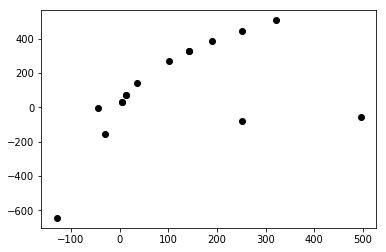

In [13]:
def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

x = d['x']
y = d['y']
x_m = np.mean(x)
y_m = np.mean(y)

center_estimate = x_m,y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)
print(center_2)
xC = np.linspace((np.min(x)-0.1*R_2), (np.max(x)+0.1*R_2), 100)
yC = np.linspace((np.min(y)-0.1*R_2), (np.max(y)+0.1*R_2), 100)
X, Y = np.meshgrid(xC,yC)
F = (X-xc_2)**2 + (Y-yc_2)**2 - R_2**2
#plt.contour(X,Y,F,[0])
plt.plot(x, y, 'ok')
plt.show()